In [4]:
import scipy
import os
import matplotlib.pyplot as plt


In [14]:
def tmscore(target, modified):
    tmscore = -1
    os.system(f"./../tmscore/TMscore {target} {modified} >> tmscore_temp_output")
    with open("tmscore_temp_output") as f:
        for line in f:
            if line.startswith("TM-score"):
                tmscore = float(line.split('=')[1].strip().split(' ')[0])
    os.system("rm tmscore_temp_output")
    return tmscore
def tmscore_dict(directory,target_pdbs):
    dict = {}
    for run_pdb in os.listdir(directory):
        if run_pdb[-1] == "b":
            target_pdb = ''
            for possible_target_pdb in target_pdbs:
                if run_pdb[0:3] == possible_target_pdb[0:3]:
                    target_pdb = possible_target_pdb
            parsed_name = run_pdb.split('_')
            dict[run_pdb] = {}
            dict[run_pdb]['protien'] = parsed_name[0]
            dict[run_pdb]['mode'] = parsed_name[1]
            dict[run_pdb]['value'] = float(parsed_name[2])
            dict[run_pdb]['rep'] = parsed_name[3]
            dict[run_pdb]['tmscore'] = tmscore(directory + target_pdb, directory + run_pdb)
    return dict

def plot_tmruns(dict,protien,mode,rep,color,marker,label=''):
    legend_marker = True
    for run_pdb in dict:
        if dict[run_pdb]['protien'] == protien and dict[run_pdb]['mode'] == mode and dict[run_pdb]['rep'] == rep:
            plt.scatter(dict[run_pdb]['value'],dict[run_pdb]['tmscore'],color=color,marker=marker)#,label=label if legend_marker else '')
def tmscore_dict_mult_conf(directory,target_pdbs):
    dict = {}
    for run_pdb in os.listdir(directory):
        if run_pdb[-1] == "b":
            parsed_name = run_pdb.split('_')
            dict[run_pdb] = {}
            dict[run_pdb]['protien'] = parsed_name[0]
            dict[run_pdb]['mode'] = parsed_name[1]
            dict[run_pdb]['value'] = float(parsed_name[2])
            dict[run_pdb]['rep'] = parsed_name[3]
            dict[run_pdb]['tmscore'] = {}
            for target_pdb in target_pdbs:
                dict[run_pdb]['tmscore'][target_pdb.split('_')[0]] = tmscore(directory + target_pdb, directory + run_pdb)
    return dict

def plot_tmruns_mult_conf(dict,run_protien,target_protiens):
    '''
    This plots all the protiens and their many tmscores in the dictionary. Since the dict is made from the output file, all pdbs in 
    the output file will be here. different runs need to be separated. 
    Assume: mode = noise. representation = z.
    '''
    colors = ['blue','red','green','black']
    markers = ['>','+','<','*']
    for i,_ in enumerate(target_protiens): # *protien* is the target protien the tmscore is against.
        first_label = True
        label = 'against: ' + target_protiens[i]
        for run_pdb in dict:
            if dict[run_pdb]['protien'] == run_protien:
                plt.scatter(dict[run_pdb]['value'],dict[run_pdb]['tmscore'][target_protiens[i]],color=colors[i],marker=markers[i], label=label if first_label else '')
                first_label = False
    plt.legend()
    plt.title(run_protien + ' sequence used with noise applied to pair rep')
    plt.xlabel('noising value')
    plt.ylabel('tmscore')

def bulk_plot_doe(d,m,t):
    plt.scatter(0,0, marker=".", color = 'blue', label='(s) single rep')
    plt.scatter(0,0, marker=".", color = 'red', label='(z) pair rep')
    plt.scatter(0,0, marker=".", color = 'green', label='(m) msa rep')
    plt.scatter(0,0, marker=".", color = 'black', label='(sz)')
    plt.scatter(0,0, marker=".", color = 'orange', label='(sm)')
    plt.scatter(0,0, marker=".", color = 'brown', label='(zm)')
    for p,marker in zip(['7MZZ','5D3W','4O75','1DGN'],['>','*','+','<']):
        print(marker,p)
        plot_tmruns(d,p,m,'s','blue',marker)
        plot_tmruns(d,p,m,'m','green',marker)
        plot_tmruns(d,p,m,'z','red',marker)
        #plot_tmruns(d,p,m,'sz','black',marker)
        #plot_tmruns(d,p,m,'sm','orange',marker)
        #plot_tmruns(d,p,m,'zm','brown',marker)
    plt.legend()
    plt.xscale('log')
    plt.xlabel('value')
    plt.ylabel('tmscore')
    plt.title(t)
    plt.show()
if False:
    bulk_plot_doe(d,'mult','multiplying representation ')
    bulk_plot_doe(d,'noise','noising representation ')
    bulk_plot_doe(d,'zero','zeroing representation ')


In [15]:
d = tmscore_dict('../data/old_data/output/',['7MZZ_none_1.0_s_prediction.pdb','5D3W_none_1.0_s_prediction.pdb','4O75_none_1.0_s_prediction.pdb','1DGN_none_1.0_s_prediction.pdb'])

Warning! Cannot parse file: ../data/old_data/output/. Chain number 0.
sh: line 1: 37818 Segmentation fault: 11  ./../tmscore/TMscore ../data/old_data/output/ ../data/old_data/output/1urpxray_downloaded_0_z_xrayscattering.pdb >> tmscore_temp_output
Warning! Cannot parse file: ../data/old_data/output/. Chain number 0.
sh: line 1: 37822 Segmentation fault: 11  ./../tmscore/TMscore ../data/old_data/output/ ../data/old_data/output/2DRI_noise_17.0_z_prediction.pdb >> tmscore_temp_output
Warning! Cannot parse file: ../data/old_data/output/. Chain number 0.
sh: line 1: 37825 Segmentation fault: 11  ./../tmscore/TMscore ../data/old_data/output/ ../data/old_data/output/2DRI_noise_9.0_z_prediction.pdb >> tmscore_temp_output
Warning! Cannot parse file: ../data/old_data/output/. Chain number 0.
sh: line 1: 37828 Segmentation fault: 11  ./../tmscore/TMscore ../data/old_data/output/ ../data/old_data/output/1ba2xray_downloaded_0_z_xrayscattering.pdb >> tmscore_temp_output
Warning! Cannot parse file: .

In [6]:
d_mult_conf_xyle = tmscore_dict_mult_conf('../data/old_data/output-xyle/',['4JA3_none_1.0_s_prediction.pdb', '4JA4_none_1.0_s_prediction.pdb', '6N3I_none_1.0_s_prediction.pdb'])

In [7]:
d_1ake_4ake_run = tmscore_dict_mult_conf('../data/old_data/output-1ake/',['1AKExray_downloaded_0_z_xrayscattering.pdb', '4AKExray_downloaded_0_z_xrayscattering.pdb','1AKE_none_1.0_s_prediction.pdb'])

In [8]:
d_2dri = tmscore_dict_mult_conf('../data/old_data/output/',['2drixray_downloaded_0_z_xrayscattering.pdb', '1ba2xray_downloaded_0_z_xrayscattering.pdb','1urpxray_downloaded_0_z_xrayscattering.pdb','2DRI_none_0.0_z_prediction.pdb'])

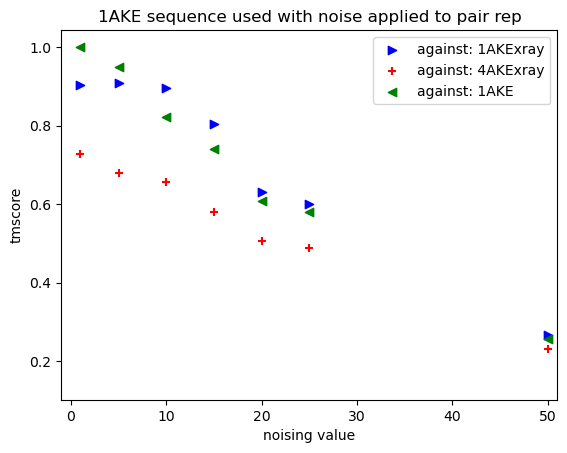

In [9]:
plot_tmruns_mult_conf(d_1ake_4ake_run,'1AKE',['1AKExray','4AKExray','1AKE'])
plt.xlim(-1,51)
plt.show()


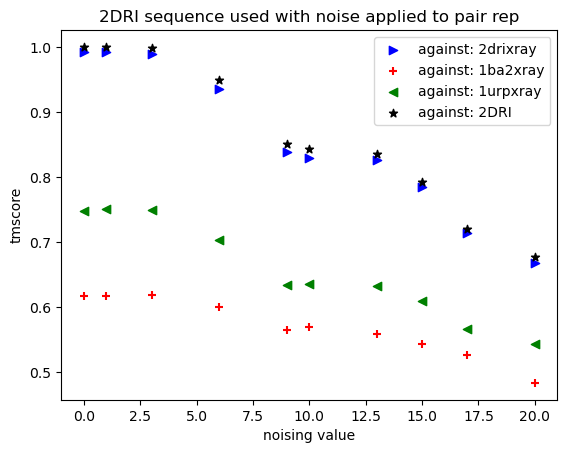

In [10]:
plot_tmruns_mult_conf(d_2dri,'2DRI',['2drixray','1ba2xray','1urpxray','2DRI'])
#plt.xlim(-1,51)
plt.show()

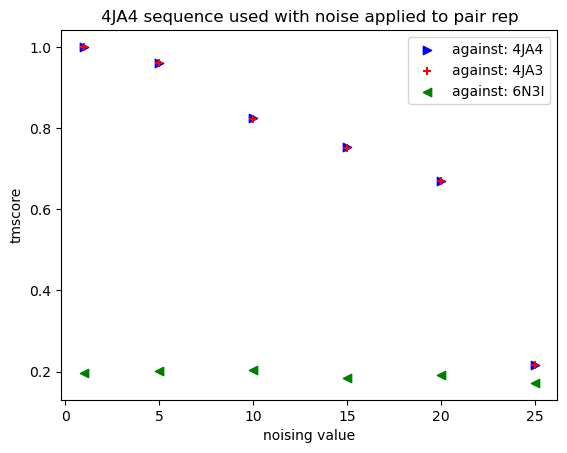

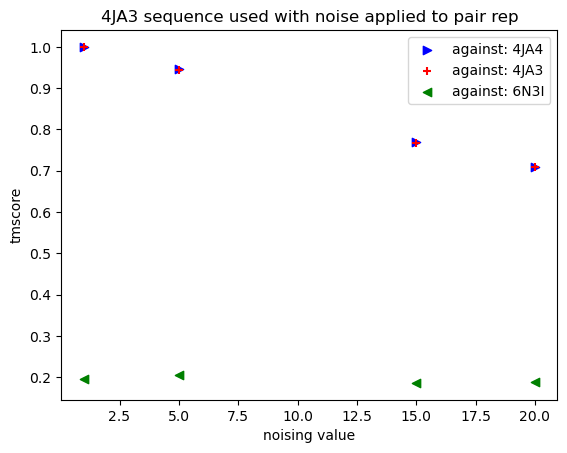

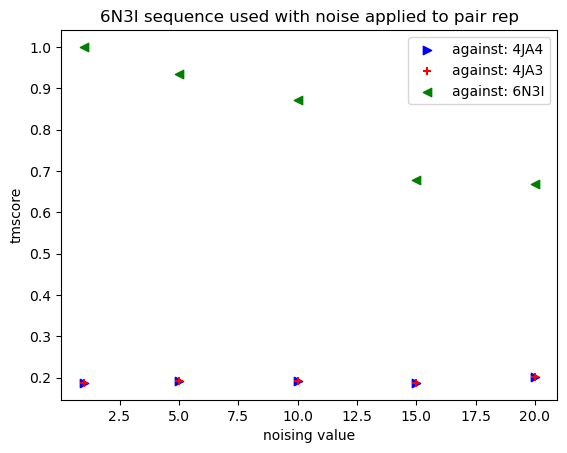

In [11]:
plot_tmruns_mult_conf(d_mult_conf_xyle,'4JA4',['4JA4','4JA3','6N3I'])
plt.show()
plot_tmruns_mult_conf(d_mult_conf_xyle,'4JA3',['4JA4','4JA3','6N3I'])
plt.show()
plot_tmruns_mult_conf(d_mult_conf_xyle,'6N3I',['4JA4','4JA3','6N3I'])
plt.show()

In [ ]:
#print(tmscore(a,b))
#plot_pdb(a)
#plot_pdb(b)
t2 = 'output/4JA3_none_1.0_s_prediction.pdb'
a10 = 'output/4JA4_noise_10.0_z_prediction.pdb'
t1 = 'output/4JA4_none_1.0_s_prediction.pdb'
t3 = 'output/6N3I_none_1.0_s_prediction.pdb'
a15 = 'output/4JA4_noise_15.0_z_prediction.pdb'
a5 = 'output/4JA4_noise_5.0_z_prediction.pdb'

print('4ja4 4ja3',tmscore(t1,t2))
print('4ja4 6n3i',tmscore(t1,t3))

print('4ja4 4ja4*noise(5)',tmscore(t1,a5))
print('4ja4 4ja4*noise(10)',tmscore(t1,a10))
print('4ja4 4ja4*noise(15)',tmscore(t1,a15))

print('4ja3 4ja4*noise(5)',tmscore(t2,a5))
print('4ja3 4ja4*noise(10)',tmscore(t2,a10))
print('4ja3 4ja4*noise(15)',tmscore(t2,a15))

print('6n3i 4ja4*noise(5)',tmscore(t3,a5))
print('6n3i 4ja4*noise(10)',tmscore(t3,a10))
print('6n3i 4ja4*noise(15)',tmscore(t3,a15))

